In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
def sigmoid(x):
  # Sigmoid activation function: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
  # Derivative of sigmoid: f'(x) = f(x) * (1 - f(x))
  fx = sigmoid(x)
  return fx * (1 - fx)

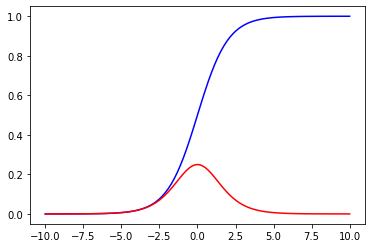

In [ ]:
X = np.linspace(-10, 10, 100)

plt.plot(X, sigmoid(X), c="b") # sigmoid in blue
fig = plt.plot(X, deriv_sigmoid(X), c="r") # sigmoid_p in red

## **Sigmoid** ##

Sigmoid takes a real value as input and outputs another value between 0 and 1. 


In [ ]:
def mse_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return ((y_true - y_pred) ** 2).mean()

## **Architecture of Neural Network** ##

This network has 2 inputs, a hidden layer with 2 neurons (h1 and h2), and an output layer with 1 neuron (o1).

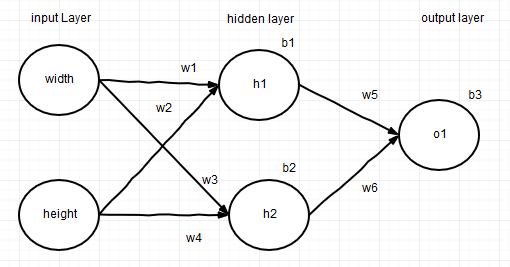


Let h1,h2,o1, denote the outputs of the neurons they represent.

h1​ = h2 ​​= f(w⋅x+b)

o1​​=f(w⋅ [h1​,h2​] +b)

## **Cost Function** ##


Before we train our network, we first need a way to quantify how “good” it’s doing so that it can try to do “better”. That’s what the loss is.

We’ll use the mean squared error (MSE) loss:

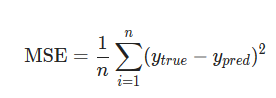

Let’s break this down:
- n is the number of samples, which is number of flower 
- ytrue​ is the true value of the variable (the “correct answer”).
- ypred​ is the predicted value of the variable. It’s whatever our network outputs.




## **Training a Neural Network** ##

We now have a clear goal: minimize the loss of the neural network. We know we can change the network’s weights and biases to influence its predictions

Then, we can write loss as a multivariable function:

L(w1​,w2​,w3​,w4​,w5​,w6​,b1​,b2​,b3​)

How would loss L change if we changed w1​? 

let’s rewrite the partial derivative in terms of ∂ypred/∂w1 instead:

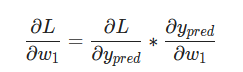

We can calculate ∂L/∂ypred, because we computed L=(1−ypred)^2 above:


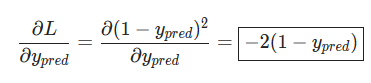

Now, let’s figure out what to do with ∂ypred/∂w1. Just like before, let h1​,h2​,o1​ be the outputs of the neurons they represent.

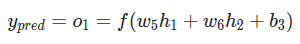

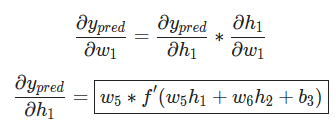


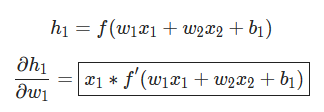

This is the second time we’ve seen f′(x)f'(x)f′(x) (the derivate of the sigmoid function) now! Let’s derive it:

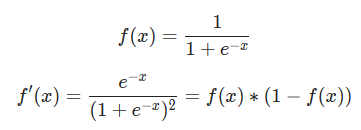

We’re done! We’ve managed to break down ∂L/∂w1​ into several parts we can calculate:

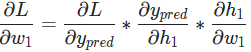

## **Training: Stochastic Gradient Descent** ##

We’ll use an optimization algorithm called stochastic gradient descent (SGD) that tells us how to change our weights and biases to minimize loss. It’s basically just this update equation:

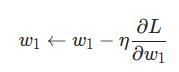

η is a constant called the learning rate that controls how fast we train. All we’re doing is subtracting η * ∂L/∂w1 from w1​:


- If ∂L/∂w1  is positive, w1​ will decrease, which makes L decrease.
- If ∂L/∂w1  is negative, w1​ will increase, which makes L decrease.

Our training process will look like this:

1. Choose one sample from our dataset. This is what makes it stochastic gradient descent - we only operate on one sample at a time.

2. Calculate all the partial derivatives of loss with respect to weights or biases (e.g. ∂L/∂w1, ∂L/∂w2).
3. Use the update equation to update each weight and bias.
4.  Go back to step 1.




In [ ]:
class OurNeuralNetwork:
  '''
  A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (h1, h2)
    - an output layer with 1 neuron (o1)

  '''
  def __init__(self):
    # Weights
    self.w1 = np.random.normal()
    self.w2 = np.random.normal()
    self.w3 = np.random.normal()
    self.w4 = np.random.normal()
    self.w5 = np.random.normal()
    self.w6 = np.random.normal()

    # Biases
    self.b1 = np.random.normal()
    self.b2 = np.random.normal()
    self.b3 = np.random.normal()

  def feedforward(self, x):
    # x is a numpy array with 2 elements.
    h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
    h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
    o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
    return o1

  def train(self, data, all_y_trues):
    '''
    - data is a (n x 2) numpy array, n = # of samples in the dataset.
    - all_y_trues is a numpy array with n elements.
      Elements in all_y_trues correspond to those in data.
    '''
    learn_rate = 0.1
    epochs = 1000 # number of times to loop through the entire dataset
    costs = [] # keep costs during training, see if they go down
    for epoch in range(epochs):
      for x, y_true in zip(data, all_y_trues):
        # --- Do a feedforward (we'll need these values later)
        sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
        h1 = sigmoid(sum_h1)

        sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
        h2 = sigmoid(sum_h2)

        sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
        o1 = sigmoid(sum_o1)
        y_pred = o1

        # --- Calculate partial derivatives.
        # --- Naming: d_L_d_w1 represents "partial L / partial w1"
        d_L_d_ypred = -2 * (y_true - y_pred)

        # Neuron o1
        d_ypred_d_w5 = h1 * deriv_sigmoid(sum_o1)
        d_ypred_d_w6 = h2 * deriv_sigmoid(sum_o1)
        d_ypred_d_b3 = deriv_sigmoid(sum_o1)

        d_ypred_d_h1 = self.w5 * deriv_sigmoid(sum_o1)
        d_ypred_d_h2 = self.w6 * deriv_sigmoid(sum_o1)

        # Neuron h1
        d_h1_d_w1 = x[0] * deriv_sigmoid(sum_h1)
        d_h1_d_w2 = x[1] * deriv_sigmoid(sum_h1)
        d_h1_d_b1 = deriv_sigmoid(sum_h1)

        # Neuron h2
        d_h2_d_w3 = x[0] * deriv_sigmoid(sum_h2)
        d_h2_d_w4 = x[1] * deriv_sigmoid(sum_h2)
        d_h2_d_b2 = deriv_sigmoid(sum_h2)

        # --- Update weights and biases
        # Neuron h1
        self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
        self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
        self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1

        # Neuron h2
        self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
        self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
        self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2

        # Neuron o1
        self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
        self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
        self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3

      # --- Calculate total loss at the end of each epoch
      if epoch % 100 == 0:
        y_preds = np.apply_along_axis(self.feedforward, 1, data)
        loss = mse_loss(all_y_trues, y_preds)
        costs.append(loss)
        print("Epoch %d loss: %.3f" % (epoch, loss))

    fig = plt.plot(costs)

Epoch 0 loss: 0.288
Epoch 100 loss: 0.150
Epoch 200 loss: 0.106
Epoch 300 loss: 0.087
Epoch 400 loss: 0.078
Epoch 500 loss: 0.072
Epoch 600 loss: 0.069
Epoch 700 loss: 0.066
Epoch 800 loss: 0.064
Epoch 900 loss: 0.062


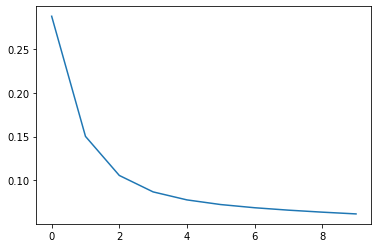

In [ ]:
# Define dataset
data = np.array([
  [-2, -1],  # Alice
  [25, 6],   # Bob
  [17, 4],   # Charlie
  [-15, -6], # Diana
])
all_y_trues = np.array([
  1, # Alice
  0, # Bob
  0, # Charlie
  1, # Diana
])
# each point is length, width, type (0, 1)

X = np.array([[3,   1.5], [2,   1],[4,   1.5], [3,   1],[3.5, .5],[2,   .5], [5.5,  1],[1,   1],])
y = np.array([1,0,1,0,1,0,1,0])

mystery_flower = [4.5, 1]
# Train our neural network!
network = OurNeuralNetwork()
network.train(X, y)